In [67]:
#SETUP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

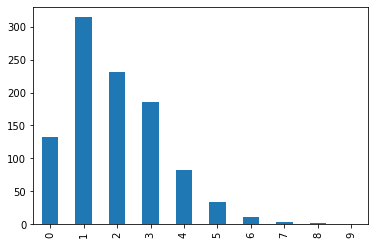

In [4]:
# 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars.
# a. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
avg_cars_waiting = 2
pd.Series(stats.poisson(avg_cars_waiting).rvs(1000)).value_counts().sort_index().plot(kind='bar')
plt.show()


In [5]:
# b. What is the probability that no cars drive up in the noon hour?
no_cars_noon = round(stats.poisson(avg_cars_waiting).pmf(0), 3)
print(f'The probability that there will be no cars at noon iss {no_cars_noon * 100}%')

The probability that there will be no cars at noon iss 13.5%


In [6]:
# c. What is the probability that 3 or more cars come through the drive through?
three_or_more_cars = round(stats.poisson(avg_cars_waiting).sf(2), 2)
print(f'The probability that there will be 3 or more cars at noon iss {three_or_more_cars * 100}%')

The probability that there will be 3 or more cars at noon iss 32.0%


In [7]:
# d. How likely is it that the drive through gets at least 1 car?
one_car = round(stats.poisson(avg_cars_waiting).cdf(1), 2)
print(f'The probability that there will be at least 1 car at noon iss {one_car * 100}%')

The probability that there will be at least 1 car at noon iss 41.0%


In [8]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:
# a. What grade point average is required to be in the top 5% of the graduating class?
SU_grad_mean = 3
SU_grad_std = .3
gpa_top_five_percent = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(1 - .05), 2)
print(f'The minimum GPA required to be in the top 5% of the graduating class is {gpa_top_five_percent}')

The minimum GPA required to be in the top 5% of the graduating class is 3.49


In [126]:
#simulation check
check_2a = (np.random.normal(3, .3, 100_000) > 3.49).mean()
print(f'The simulation shows a gpa greater than 3.49 is in the top {check_2a * 100}%')

The simulation shows a gpa greater than 3.49 is in the top 5.056%


In [9]:
# b. What GPA constitutes the bottom 15% of the class?
gpa_bottom_fifteen_percent = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.15), 2)
print(f'Anything belwao a {gpa_bottom_fifteen_percent} GPA is considered bottom 15% of the class')


Anything belwao a 2.69 GPA is considered bottom 15% of the class


In [129]:
#simulation check
check_2b = (np.random.normal(3, .3, 100_000) < 2.69).mean()
print(f'The simulation shows a gpa greater than 3.49 is in the bottom {check_2b * 100}%')

The simulation shows a gpa greater than 3.49 is in the bottom 15.018999999999998%


In [10]:
# c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
top_third_decile_range = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.4), 3)
bottom_third_decile_range = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.3), 3)
print(f'The range of the third decile is between {bottom_third_decile_range} to {top_third_decile_range}.')
print("A student with a 2.8 GPA would not qualify for this scholarship")

The range of the third decile is between 2.843 to 2.924.
A student with a 2.8 GPA would not qualify for this scholarship


In [11]:
# d. If I have a GPA of 3.5, what percentile am I in?
gpa_three_point_five = round(stats.norm(SU_grad_mean, SU_grad_std).cdf(3.5), 2)
print(f'If I have a GPA of 3.5, I am in the {gpa_three_point_five * 100} percentile.')

If I have a GPA of 3.5, I am in the 95.0 percentile.


In [130]:
# 3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?
avg_click_through_rate = .02 # chance of click through
visitors = 4326 # trials
click_throughs = 97
click_through_probability = round(stats.binom(visitors, avg_click_through_rate).sf(click_throughs), 2)
print(f'The probability that {click_throughs} or more people will click through is {click_through_probability * 100}%.')

The probability that 97 or more people will click through is 12.0%.


In [133]:
# Check utilizing simulation
check_3 = (np.random.binomial(visitors, avg_click_through_rate, 100_000) > 97).mean()
print(f'The simulation shows that {check_3 * 100}% of the people who visited the site clicked through.')

The simulation shows that 11.924999999999999% of the people who visited the site clicked through.


In [120]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place.
# Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct?
hw_questions = 100
random_probability_guesses = pd.Series(np.round(np.random.rand(hw_questions), 2)) # Created a series of 100 random probabilities in the hundredths place
#print(random_probability_guesses)
first_60_answers = random_probability_guesses.head(60)  # first 60 answers


The probability that at least one of your first 60 answers is correct is 3209.0000000000005%
